# 1.Linear Regression

In [1]:
import pandas as pd

In [2]:
prestige = pd.read_csv('data/occupation_prestige.csv')
prestige

,job,education,income,under_35,prestige,census,type
0,gov.administrators,13.11,12351,11.16,68.8,1113,prof
1,general.managers,12.26,25879,4.02,69.1,1130,prof
2,accountants,12.77,9271,15.70,63.4,1171,prof
3,purchasing.officers,11.42,8865,9.11,56.8,1175,prof
4,chemists,14.62,8403,11.68,73.5,2111,prof
...,...,...,...,...,...,...,...
97,bus.drivers,7.58,5562,9.47,35.9,9171,bc
98,taxi.drivers,7.93,4224,3.59,25.1,9173,bc
99,longshoremen,8.37,4753,NaN,26.1,9313,bc
100,typesetters,10.00,6462,13.58,42.2,9511,bc


In [3]:
prestige.describe()

,education,income,under_35,prestige,census
count,102.000000,102.000000,97.000000,102.000000,102.000000
mean,10.738039,6797.901961,30.472784,46.833333,5401.774510
std,2.728444,4245.922227,31.826063,17.204486,2644.993215
min,6.380000,611.000000,0.520000,14.800000,1113.000000
25%,8.445000,4106.000000,4.140000,35.225000,3120.500000
50%,10.540000,5930.500000,15.510000,43.600000,5135.000000
75%,12.647500,8187.250000,54.770000,59.275000,8312.500000
max,15.970000,25879.000000,97.510000,87.200000,9517.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='education', ylabel='income'>

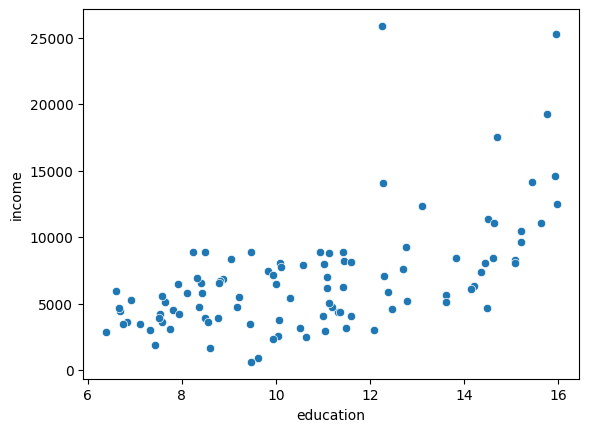

In [6]:
sns.scatterplot( x='education' , y= 'income', data = prestige)

<AxesSubplot: xlabel='income', ylabel='Count'>

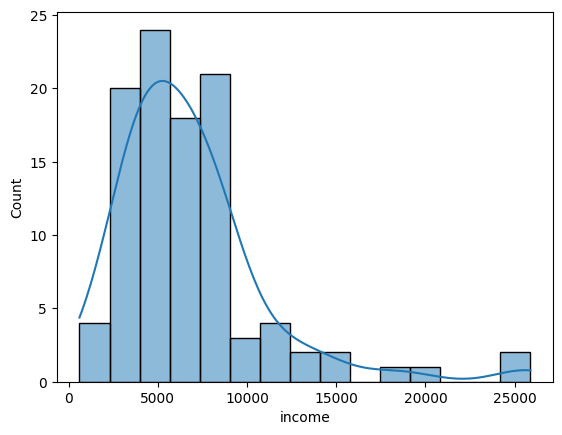

In [7]:
sns.histplot(x='income' ,data = prestige, kde= True)

In [8]:
import numpy as np
prestige['log_income'] = np.log(prestige.income)
prestige

,job,education,income,under_35,prestige,census,type,log_income
0,gov.administrators,13.11,12351,11.16,68.8,1113,prof,9.421492
1,general.managers,12.26,25879,4.02,69.1,1130,prof,10.161187
2,accountants,12.77,9271,15.70,63.4,1171,prof,9.134647
3,purchasing.officers,11.42,8865,9.11,56.8,1175,prof,9.089866
4,chemists,14.62,8403,11.68,73.5,2111,prof,9.036344
...,...,...,...,...,...,...,...,...
97,bus.drivers,7.58,5562,9.47,35.9,9171,bc,8.623713
98,taxi.drivers,7.93,4224,3.59,25.1,9173,bc,8.348538
99,longshoremen,8.37,4753,NaN,26.1,9313,bc,8.466531
100,typesetters,10.00,6462,13.58,42.2,9511,bc,8.773694


<AxesSubplot: xlabel='log_income', ylabel='Count'>

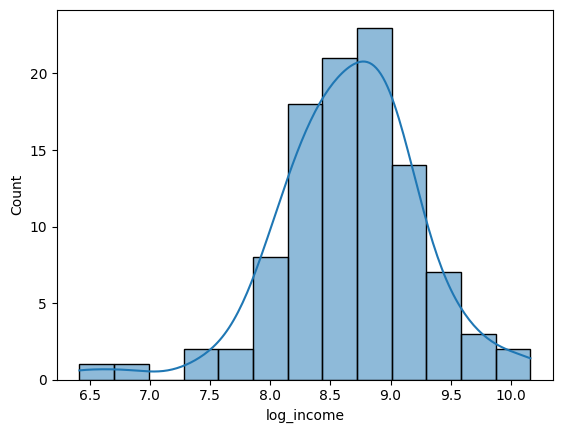

In [9]:
sns.histplot(x='log_income' ,data = prestige, kde= True)

In [34]:
import seaborn as sns

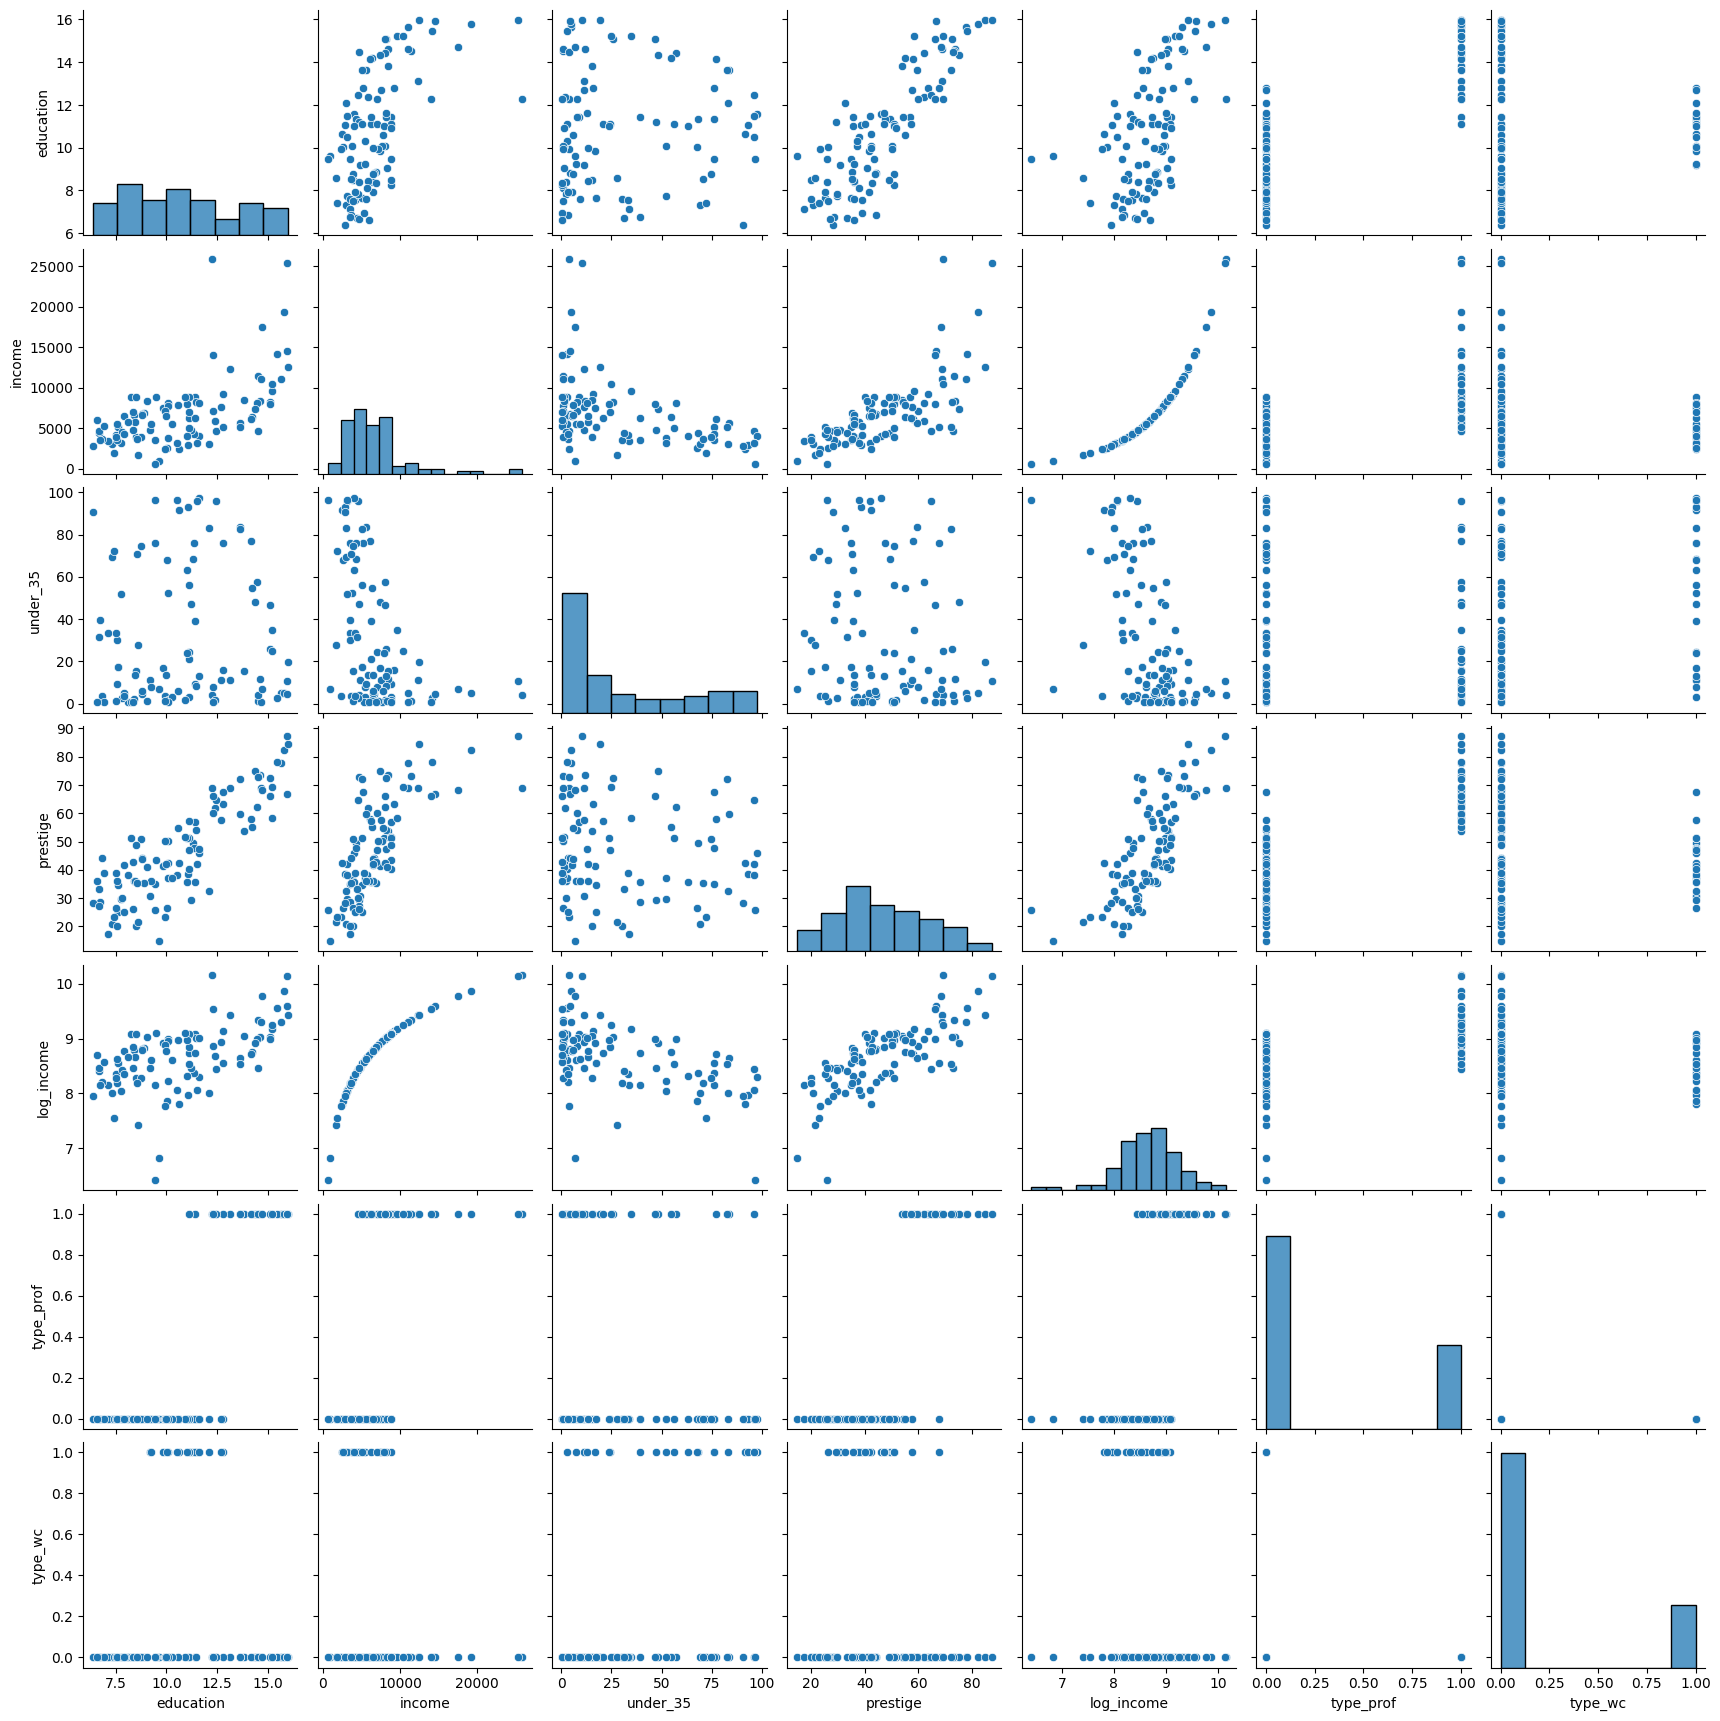

In [35]:
sns.pairplot(prestige)

<AxesSubplot: xlabel='prestige', ylabel='log_income'>

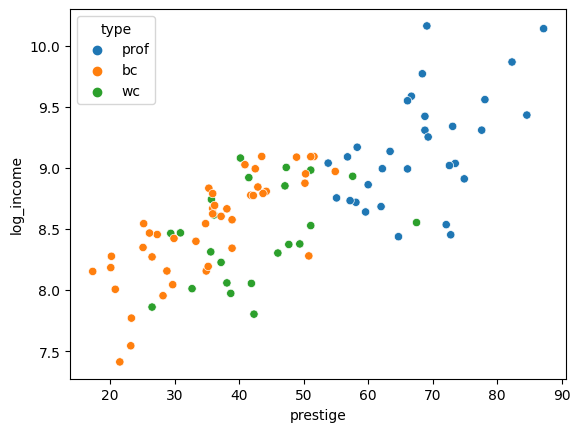

In [11]:
sns.scatterplot(x= 'prestige', y ='log_income', hue='type', data = prestige)

In [15]:
# section1 
prestige = pd.read_csv('data/occupation_prestige.csv')
prestige['log_income'] = np.log(prestige.income)
job_title = prestige.job
prestige = prestige.drop(columns= ['job','census'],axis=1)
prestige = pd.get_dummies(prestige,drop_first=True)

prestige

,education,income,under_35,prestige,log_income,type_prof,type_wc
0,13.11,12351,11.16,68.8,9.421492,1,0
1,12.26,25879,4.02,69.1,10.161187,1,0
2,12.77,9271,15.70,63.4,9.134647,1,0
3,11.42,8865,9.11,56.8,9.089866,1,0
4,14.62,8403,11.68,73.5,9.036344,1,0
...,...,...,...,...,...,...,...
97,7.58,5562,9.47,35.9,8.623713,0,0
98,7.93,4224,3.59,25.1,8.348538,0,0
99,8.37,4753,NaN,26.1,8.466531,0,0
100,10.00,6462,13.58,42.2,8.773694,0,0


In [36]:
from sklearn.linear_model import LinearRegression

# model
scikit-learn wants our respose var in a separate array (series) to pur predictor variables

In [41]:
# set our response array
response_var = prestige['log_income']

# put out predictors in a data frame
predictors_vars = prestige.drop(columns=['log_income','income'], axis=1)
predictors_vars


,education,under_35,prestige,type_prof,type_wc
0,13.11,11.16,68.8,1,0
1,12.26,4.02,69.1,1,0
2,12.77,15.70,63.4,1,0
3,11.42,9.11,56.8,1,0
4,14.62,11.68,73.5,1,0
...,...,...,...,...,...
97,7.58,9.47,35.9,0,0
98,7.93,3.59,25.1,0,0
99,8.37,NaN,26.1,0,0
100,10.00,13.58,42.2,0,0


In [42]:
# let's do some median imputation on the (positively skewed) under_35 variable

In [63]:
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
predictors_vars_imp = pd.DataFrame(imp_median.fit_transform(
    predictors_vars), columns=predictors_vars.columns)

predictors_vars_imp


,education,under_35,prestige,type_prof,type_wc
0,13.11,11.16,68.8,1.0,0.0
1,12.26,4.02,69.1,1.0,0.0
2,12.77,15.70,63.4,1.0,0.0
3,11.42,9.11,56.8,1.0,0.0
4,14.62,11.68,73.5,1.0,0.0
...,...,...,...,...,...
97,7.58,9.47,35.9,0.0,0.0
98,7.93,3.59,25.1,0.0,0.0
99,8.37,15.51,26.1,0.0,0.0
100,10.00,13.58,42.2,0.0,0.0


In [48]:
# building model
model = LinearRegression()
model.fit(predictors_vars_imp,response_var)
model.score(predictors_vars_imp, response_var)# R^2

0.7458690734617146

In [50]:
print(model.intercept_,model.coef_)
# log(inc)=7.9 + -0.03 edu + -0.008 under_35 ...

7.941508286944359 [-0.03148863 -0.00882441  0.02680641  0.06593335  0.19551079]


In [51]:
pd.DataFrame({'Variable': predictors_vars_imp.columns.values,
              'Coeffocoent': model.coef_})


,Variable,Coeffocoent
0,education,-0.031489
1,under_35,-0.008824
2,prestige,0.026806
3,type_prof,0.065933
4,type_wc,0.195511


In [52]:
prestige.corr()

,education,income,under_35,prestige,log_income,type_prof,type_wc
education,1.000000,0.577580,0.021643,0.850177,0.548105,0.814370,0.056381
income,0.577580,1.000000,-0.452969,0.714906,0.887259,0.588282,-0.222927
under_35,0.021643,-0.452969,1.000000,-0.153544,-0.527497,-0.107389,0.393625
prestige,0.850177,0.714906,-0.153544,1.000000,0.741056,0.811110,-0.144660
log_income,0.548105,0.887259,-0.527497,0.741056,1.000000,0.558094,-0.187322
type_prof,0.814370,0.588282,-0.107389,0.811110,0.558094,1.000000,-0.356535
type_wc,0.056381,-0.222927,0.393625,-0.144660,-0.187322,-0.356535,1.000000


In [67]:
# anoter method
import statsmodels.api as sm

# add in the constant to the data
predictors_vars_imp = sm.add_constant(predictors_vars_imp)
sm_model = sm.OLS(response_var, predictors_vars_imp).fit()
print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:             log_income   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     56.35
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           4.69e-27
Time:                        12:04:52   Log-Likelihood:                -20.796
No. Observations:                 102   AIC:                             53.59
Df Residuals:                      96   BIC:                             69.34
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9415      0.219     36.202      0.0

# 2.Logistic Regression

In [1]:
import pandas as pd
prestige = pd.read_csv('data/occupation_prestige.csv')
prestige

,job,education,income,under_35,prestige,census,type
0,gov.administrators,13.11,12351,11.16,68.8,1113,prof
1,general.managers,12.26,25879,4.02,69.1,1130,prof
2,accountants,12.77,9271,15.70,63.4,1171,prof
3,purchasing.officers,11.42,8865,9.11,56.8,1175,prof
4,chemists,14.62,8403,11.68,73.5,2111,prof
...,...,...,...,...,...,...,...
97,bus.drivers,7.58,5562,9.47,35.9,9171,bc
98,taxi.drivers,7.93,4224,3.59,25.1,9173,bc
99,longshoremen,8.37,4753,NaN,26.1,9313,bc
100,typesetters,10.00,6462,13.58,42.2,9511,bc


In [2]:
import numpy as np
prestige = pd.read_csv('data/occupation_prestige.csv')
prestige['log_income'] = np.log(prestige.income)
job_title = prestige.job
prestige = prestige.drop(columns= ['job','census'],axis=1)
prestige = pd.get_dummies(prestige,drop_first=True)

response_var = prestige['log_income']
# put out predictors in a data frame
# predictors_vars = prestige.drop(columns=['log_income','income'], axis=1)
# predictors_vars

from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
predictors_vars_imp = pd.DataFrame(imp_median.fit_transform(
    prestige), columns=prestige.columns)

predictors_vars_imp

,education,income,under_35,prestige,log_income,type_prof,type_wc
0,13.11,12351.0,11.16,68.8,9.421492,1.0,0.0
1,12.26,25879.0,4.02,69.1,10.161187,1.0,0.0
2,12.77,9271.0,15.70,63.4,9.134647,1.0,0.0
3,11.42,8865.0,9.11,56.8,9.089866,1.0,0.0
4,14.62,8403.0,11.68,73.5,9.036344,1.0,0.0
...,...,...,...,...,...,...,...
97,7.58,5562.0,9.47,35.9,8.623713,0.0,0.0
98,7.93,4224.0,3.59,25.1,8.348538,0.0,0.0
99,8.37,4753.0,15.51,26.1,8.466531,0.0,0.0
100,10.00,6462.0,13.58,42.2,8.773694,0.0,0.0


In [3]:
# split our data into predictors and the response
predictors = predictors_vars_imp.drop(columns=['type_prof','type_wc'],axis=1)
response= predictors_vars_imp.type_prof

## Train-Test Split; k-fold cross validation

In [4]:
from sklearn.model_selection import train_test_split

pred_train, pred_test, resp_train, resp_test = (
    train_test_split(predictors, response, test_size=0.3, random_state=7))
# if we want all of our results to be the same we should set random state


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
model.fit(pred_train, resp_train)
model.score(pred_train, resp_train)


0.9859154929577465

## k-fold cv 

In [6]:
scores = cross_val_score(model, pred_train,resp_train,scoring='f1',cv=5)
scores

/Users/zhangjiahao/Desktop/code/venv39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhangjiahao/Desktop/code/venv39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

array([0.75      , 0.66666667, 1.        , 1.        , 1.        ])

In [7]:
pred_test_probs = model.predict_proba(pred_test)
pred_test_probs=pred_test_probs[:,1]
pred_test_probs

array([9.18965969e-01, 4.87187833e-04, 1.06850601e-03, 3.23509835e-05,
       4.36684583e-03, 2.70940444e-01, 1.10533031e-01, 9.56119290e-01,
       9.78479064e-01, 8.86266449e-06, 1.06511408e-02, 1.58717568e-03,
       8.63348449e-05, 7.68328066e-01, 1.41519775e-01, 2.34984421e-03,
       2.47659605e-01, 6.83688600e-01, 3.59953369e-05, 9.99831510e-01,
       3.86525203e-01, 9.76445137e-05, 8.54341169e-01, 5.14936843e-01,
       1.47680134e-03, 9.97977134e-01, 4.20768521e-05, 9.55238444e-06,
       9.69726207e-04, 4.11735997e-03, 9.05595968e-05])

In [9]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true =resp_test, y_score=pred_test_probs)

0.9500000000000001